In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("batdongsan_normalized.csv", encoding='utf-8-sig')

In [ ]:
cols = ["price_ty", "area_m2", "bedrooms_num", "toilets_num"]

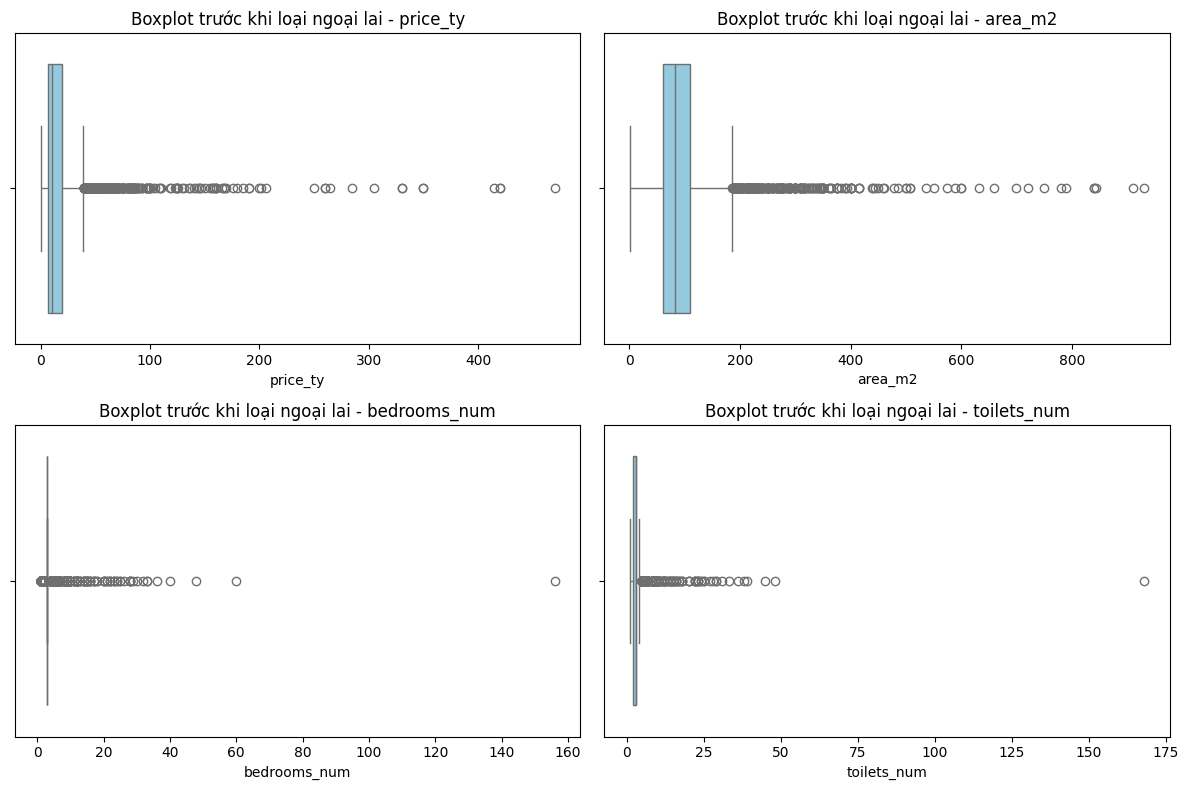

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot trước khi loại ngoại lai - {col}")
plt.tight_layout()
output_path = os.path.join("img", "boxplot_before_outliers.png")
plt.savefig(output_path, bbox_inches='tight')
plt.show()

In [ ]:
def remove_outliers_IQR(data, col):
    if col == 'bedrooms_num' or col == 'toilets_num':
      Q1 = data[col].quantile(0)
    else:
      Q1 = data[col].quantile(0.2)

    Q3 = data[col].quantile(0.8)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

df_clean = df.copy()
for col in cols:
  if col == 'price_ty' or col == 'area_m2':
    df_clean = remove_outliers_IQR(df_clean, col)

print("Số lượng bản ghi sau khi loại bỏ ngoại lai:", len(df_clean))

Số lượng bản ghi sau khi loại bỏ ngoại lai: 2569


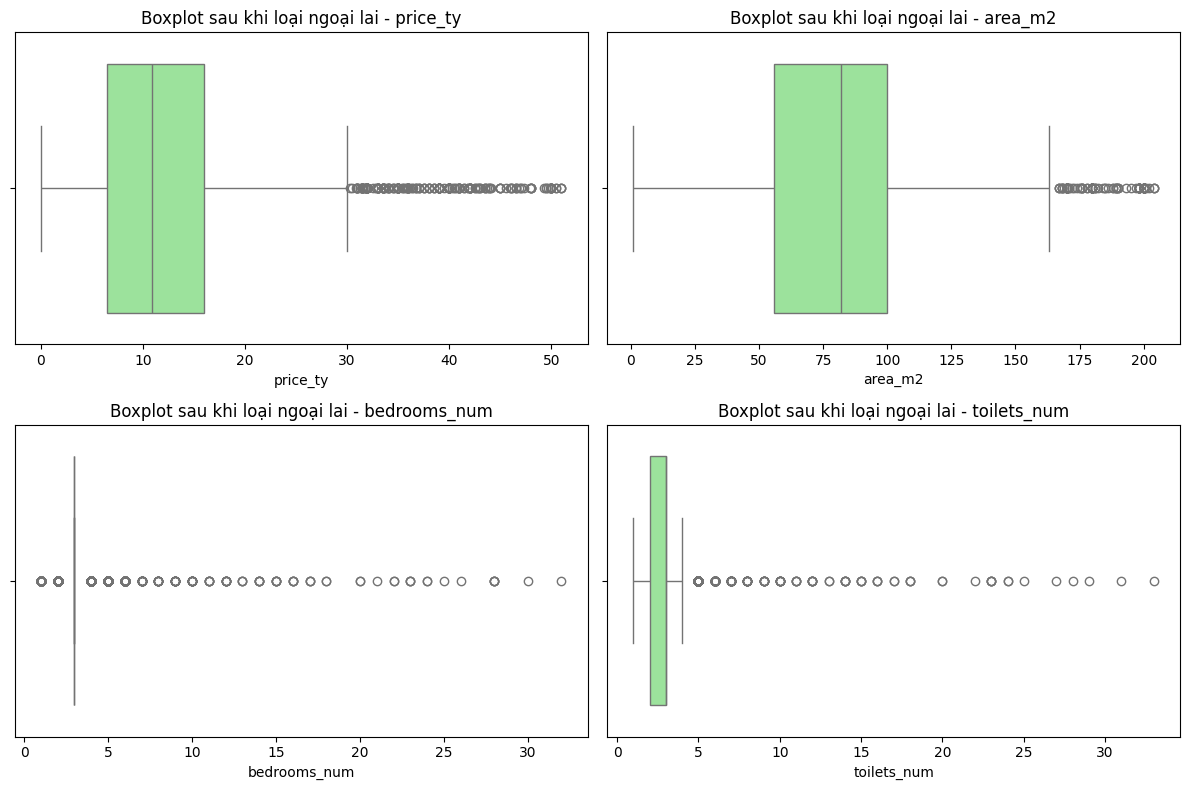

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_clean[col], color="lightgreen")
    plt.title(f"Boxplot sau khi loại ngoại lai - {col}")
plt.tight_layout()
output_path = os.path.join("img", "boxplot_after_outliers.png")
plt.savefig(output_path, bbox_inches='tight')
plt.show()

In [7]:
df_clean.to_csv("batdongsan_data_no_outliers.csv", index=False, encoding='utf-8-sig')